# Data Science: Infering and Modeling

<hr/>

## Section 1

## Parameters and Estimates

We need to understand the connection between pools and the probability theory. Let's construct a scenario that we can work, and that is similar to the one that pollsters face.

We will use an urn instead of voters. And because pollsters are competing with other pollsters for media attention, we will imitate that by having our competition with a $25 price.

The challenge is to guess the spread between the proportion of *blue and red balls* in the urn.

<center><img src="images/urn.png" width=100 height=100/></center>

Before making  a prediction, we can take a sample, with replacement, from the urn. To mimic the fact that running pools is expensive, it will cost us $0.10 per bead you sample. So if we sample size is 250 and you win, we'll break even, as we'll have to pay me $25 to collect your $25.

Our entry into the competition can be an interval. If the interval we submit contains the true proportion, we get half what you paid and pass to second phase of the competition.

The second phase of the competition, the entry with the smallest interval is selected as the winner.

The ***dslabs*** package includes a function that shows a random draw from the urn. The code that we can write to see a sample is:

In [1]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
library( tidyverse )
library( dslabs )

ds_theme_set()

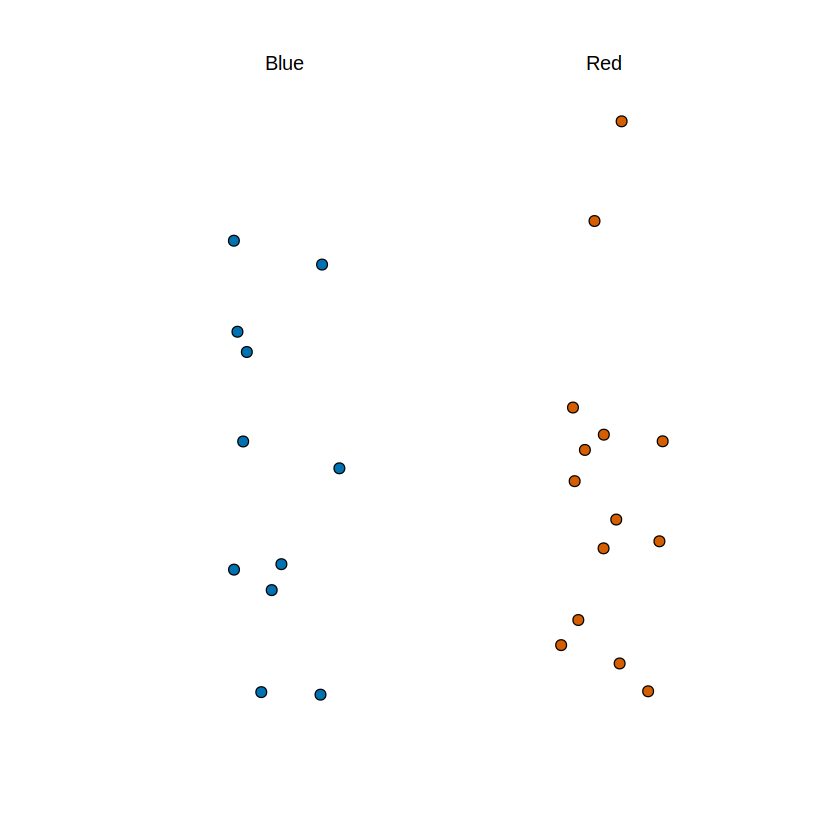

In [3]:
take_poll( 25 )

Now that we know the rules, think about how we would construct our interval. Notice that we have just described a *simple sampling model for opinion polls*. The beads inside urn represent the individuals that will vote on election day. Those that will vote **Republican** are represented with **read beans**, and **Democrats** with **blue beads**, we assume there are no other colors, that there are just two parties.

We want to predict the proportion of blue beads in the urn. Let's call this quantity \quantity, which in turn tell us the proportion of red beads, $1-p$, and the spread, $p - (1-p)$, which simplfies $2p - 1$.

Concepts:

* In statistical textbooks, the beads in the urn are called **the population**. 
* The proportion of blue beads in teh population, p, is called **parameter**. 
* The 25 beads that we saw in an earlier plot that's called a **sample**.
* The task of **statistical inference** is to *predict the parameter*, p, using the observed in the *sample*

Now we can do this with just the 25 observations we showed you?. For example, given that we see 14 red and 11 blue, it is unlikely that *p* is bigger than 0.9 or smaller than 0.1. The proportion red and blue. The proportion of reds and blues will be different every time we run the above code, the *take_poll* function.

But are we ready to predict with certainly that there are more red beads than blue?. Ok, what we want to do is contruct and *estimate of p* using only the information we observe. An *estimate* can be thought of as a *summary of the observed data that we think is informative about the parameter of interes*. In this case, the proportion of blue beads is $11/25 = 0.44$, but as the sample proportion is a *random variable*, if we run the *take_poll(25)* n-times, we will get different answers.

This set of results describing the **distribution of this random variable**,  we'' be able to gain insights into how good this estimate is and how we can make it better.


#### Key points

* the task of statistical inference is to estimate an unknown population parameter using observed data from a *sample*.
* In a sampling model, the collection of elements in the urn is called *population*.
* A *parameter* is a number that summarizes data for an entire population.
* A *sample* is observed data from a subset of the population.
* An *estimate* is a summary of the observed data about a parameter that we believe is informative.
* We want to predit the proportion of the blue beads in the urn, the parameter *p*. The proportion of red beans in the urn is $1 - p$ and the *spread* is $2p - 1$.
* The *sample proportion* is a **random variable**. Sampling gives random results drawn from the population distribution.

### The sample average

Once we have this estimate (previous example), we can easily report an estimate of the spread. But for simplicity, we will illustrate the concept of *statistical inference* for estimating *p*. 

We will use our knowledge of probability to defend our use of the *sample proportion*, and quanitfy how close we think it is from the population proportion *p*. We start by defining the randmo variable *X*, it's going to be 1 if we pick a blue bead at random, and 0 it's red. This implies that we're assuming that the population, the beads in the urn, are a list of 0s and 1s.

If we sample *N-beads*, then the *average* of the draws $X_1$ through $X_N$ is equivalent to the proportion of blue beads in our sample. The average is denoted by

$$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$

In general, the statistics textbooks, a bar on top of a symbol means the **average**.

The theory we just learned about the sum of draws becomes useful, because we know the distribution of the sum *N-times X-bar*

$$N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = (X_1 + X_2 + \ldots + X_N)$$



For simplicity, let's assume that the draws are independent. After we see each smaple bead, we return it to the urn, it's a sample with replacement. In this case, what do we know about the distribution of the sum of draws?

We know that the expecte value of the sum of draws is $N\overline{X}$ of the values in the urn. We know that the average of the 0s and 1s in the urn must be the proportion *p*, the value we want to estimate. Here we don't know what is in the urn, we know there are blue and red beads, but we don't know how many of each, this is what we're trying to find out.

Just like we use variable to define unknowns in systems of equations. In statistical inference, we define parameteres to define unknown parts of our models. In the urn model we are using to mimic an opinion poll, we do not know the proportion of blue beads in the urn, we define the parameter *p* to represent this quantity.

Note that the ideas presented here, on how we estimate parameters and provide insights into how good these estimates are, extrapolate to many data science tasks.

#### Key points

* Many common data science tasks can be framed as estimating a parameter from a sample.
* We illustrate statistical inference by walking through the process to estimate *p*. We can easily calculate an estimate of the spread, *2p - 1*.
* Consider ramdon variable *X* that is 1 if blue bead is chosen and 0 if a red bead is chosen. The proportion of blue beads in *N-draws* is the **average of the draws** $X_1, X_2, \ldots , X_N$.
* $\overline{X}$ is the *sample average*. In statistics, a bar on top of a symbol denotes the average. $\overline{X}$
  $$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$
* The number of blue beads drawn in *N-draws*, $N\overline{X}$, is *N* times the proportion of values in the urn. However, we do not known the true proportion: we are trying to estimate this parameter *p*

### Polling versus forecasting  (*sondeo versus pronóstico*)

Let's make an important clarification related to the practical problem of forecasting the election (pronóstico de elección). If a poll is conducted 4 months before the elecction, it is estimation the *p* for that moment, not for election day. But, note that the *p* for election night might be different since people's opinions fluctuate through time.

The polls provided the night before the election tend to be the mos accurate since opinions don't change that much in a couple of days.

However, **forecasters** try to build tools that model how opinions vary across time and try to predict the election day result, takeing into consideration the fact that opinions fluctuate.

### Properties of our estimate


To understand how good our estimate is, we'll describe the *statistical properties of the random variable* we just defined, ***the sample proportion***.

Using what we have learned, the expected value of the sum *N times $\overline{X}$* is *N times the average of the urn, p*.

$$
\begin{array}{l}
    \overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N} \\
    \\
    N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = X_1 + X_2 + \ldots + X_N \\
    \\
    E(N\overline{X}) = N \ast p \implies \frac{E(N\overline{X})}{N} = E(\overline{X}) = p
\end{array}
$$

So dividing by the *non-ramdom constant N* give us that the expected value of the average $\overline{X}$ is *p*.

We also can use what we know about ***standard error***. We know that the *standard error* of the sum is *square root of N times a standard deviation of the values of the urn*.

We learn a formula that tells us that it's:

$$ (1 - 0) \sqrt{p(1 - p)} $$

Because we are dividing by the *sum N*, we arrive at the following formula for the *standard error of the average*:

$$ SE(\overline{X}) = \sqrt{\frac{p(1 - p)}{N} } $$

This result reveals the power of polls. We can make the *standard error* as samll as we want by increasing the sample size *N*. The ***law of large numbers*** tells us that with a large enough poll, our estimate converges to *p*. If we take a large enough poll to make our standard error about 0.01, we'll be quite certain about who will win.



But, how large does the poll have to be for standard error to be this small?. One problem is that we do not know *p*, so we can't actually compute the standard error. Let's assume that *p = 0.51* and make a plot of the standard error versus *sample size N*, here is the graph:

<center><img src="images/standard_error.png" with="350" height="350" /></center>

We can see that it's dropping, we see that would need a poll of over 10,000 people to get the standard error as low as we want it to be. Polls if this size are very expensive and it is rare that they do, between other reasons.

For a *sample size of 1,000*, if we set *p = 0.51*, the standard error is about *0.15*, or *1.5%* points. So even with large polls for close elections, $\overline{X}$ can lead us astray if we don't realize it's a random variable.

#### Key points

* When interpreting values of $\overline{X}$, it is important to remember that $\overline{X}$ is random variable with an expected value and standard error that representes the sample proportion of positive events.
* The expected value of $\overline{X}$ is the parameter of *interest p*: $E(\overline{X}) = p$.
* As the number of draws *N* increases, the standard error of our estimate $\overline{X}$ decreases. The standard error (SE) of the average of $\overline{X}$ over *N* is $SE(\overline{X}) = \sqrt{p(1-p)/N}$
  * In theory, we can get more accurate estimates of *p* by increasing *N*. In practice, there are limits on the size of *N* due to costs.
  * We can also use other random variables equations to determine the expected value of the sum of draws *E(S)* and standard error of the sum of draws *SE(S)*:
    $$
    \begin{array}{l}
        E(S) = Np \\ 
        SE(S) = \sqrt{Np(1-p)}
    \end{array}
    $$

Exercise 1. Polling - expected value of S

We suppose you poll a population in which a proportion *p* of voters are Democrats and *1-p* are Republicans. You sample size is *N=25*. Consider the random variable *S*, which is the **total number of Democrats** in your sample. What is the expected value of this random variable *S*?.

<center>E(S) = Np = 25p</center>

Exercise 2. Polling - standard error of S

Again, consider the random variable *S*, which is the **total number of Democrats** in your sample of 25 voters. The variable *p* describes the proportion of Democrats, whereareas *1-p* describes the proportion of Republicans. What is the standard error of S?.

$$SE(S) = \sqrt{Np(1-p)} = \sqrt{25p(1-p)}$$


Exercise 3. Polling - expected value of $\overline{X}$.

Consider the random variable *S/N*, which is equivalent to the sample average that we have been denoting as $\overline{X}$. The variable *N* represents the size and *p* is the proportion of Democrats in the population. What is the expected value of $\overline{X}$?.
$$ E(\overline{X}) = p$$


Exercise 4. Polling - standard error of $\overline{X}$

What is the standar error of the sample average, $\overline{X}$?.

The variable *N* represents the sample size and *p* is the proportion of Democrats in the population.

$$  SE(\overline{X}) = \sqrt{p(1-p)/N} $$

Exercise 5. *SE* versus *p*

Write a line of code that calculate the standard error (*SE* or *se*) of a sample average when you poll 25 people in the population. Generate a sequence of 100 proportions of Democrats *p* that vary from 0 (no Democrats) to 1 (all Democrats).

Plot *se* versus *p* for the 100 different proportions.

Instructions:

* Use the *seq* function of R to generate a vector of 100 values of *p*, that range from 0 to 1.
* Use the *sqrt* function to generate a vector of standard errors for all values of *p*.
* Use the *plot* function to generate a plot with *p* on the x-axis and *se* on the y-axis.

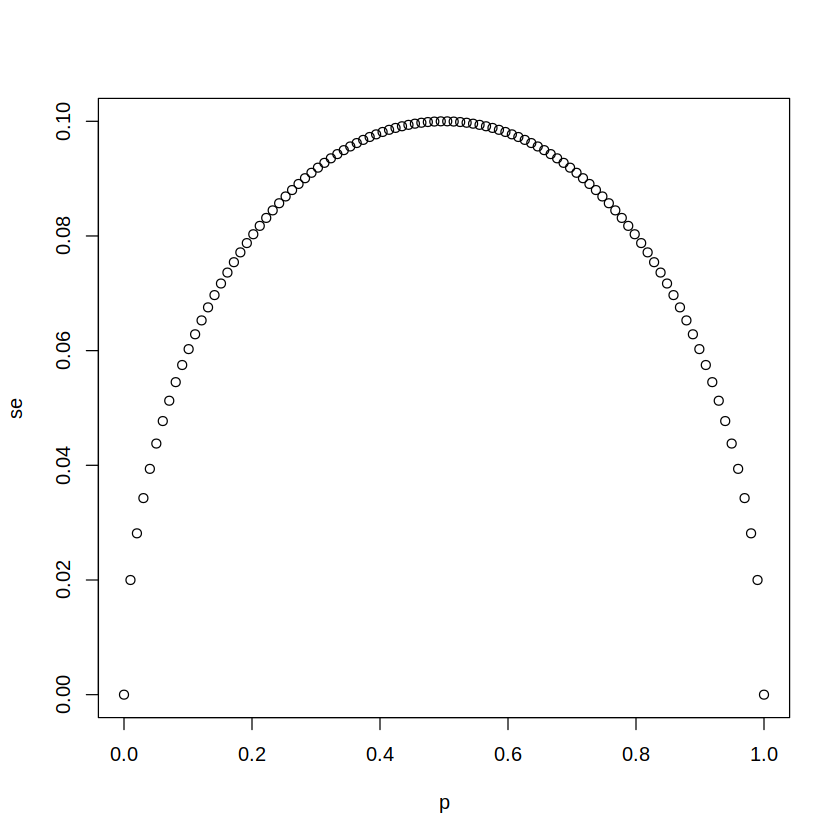

In [2]:
N <- 25                                             # number of people polled
p <- seq( from=0, to=1, length.out=100 )            # sequence of 100 proportions in range 0 to 1.
se <- sqrt(p*(1-p)/N)                                # create se for each sample average.

plot( p, se )

Exercise 6. Multiple plots of *se* versus *p*.

Using the same code as an the previous exercise, create a *for-loop* that generates three plots of *p* versus *se* when the sample sizes equal *N=25*, *N=100*, and *N=1000*.

Instruction:

* the *for-loop* should contain two lines of code to be repeated for three different values of *N*.
  * the first line within the *for-loop* should use the *sqrt* function to generate a vector of standard errors, *se*, for all values of *p*.
  * the second line within the *for-loop* should use the *plot* function to generate a plot with *p* on x-axis and *se* on the y-axis.
* Use the *ylim* argument to keep y-axis limits constant across all three plots. The lower limit should be equalt to 0, and the upper limit should equal 0.1.

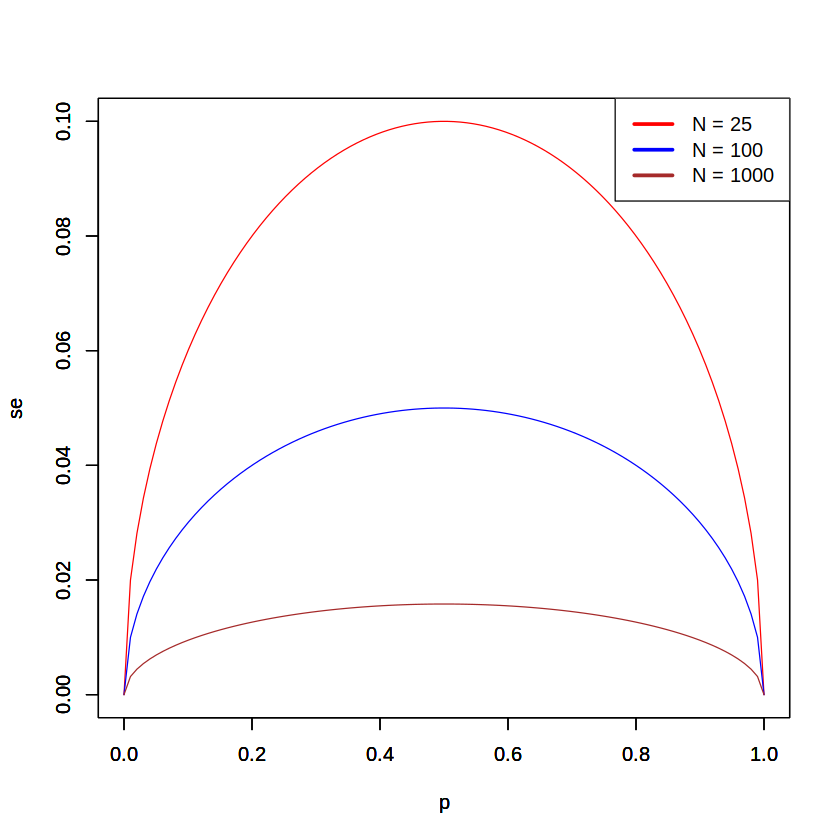

In [19]:
p<- seq( 0, 1, length=100 )
sample_sizes <- c( 25,100,1000 )                            # vector contains the three sample sizes.

nord <- 0
for ( x in sample_sizes ) {
    se <- sqrt( p*(1-p)/x ) 
    if (nord == 0) {
        color = 'red'
        nord <- nord + 1
    } 
    else if (nord == 1) {
        color = 'blue'
        nord <- nord + 1
        par( new=TRUE )
    } else {
        color = 'brown'
        nord <- nord + 1
        par( new=TRUE )
    }
    plot( p, se, type="l", col=color, ylim=c(0,0.1) )
}
legend("topright", legend=c("N = 25","N = 100","N = 1000"), lwd=3, col=c("red","blue","brown") )

Exercise 7. Expected value of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the expected value of *d*?

$$
\begin{array}{l}
    d = \overline{X} - (1 - \overline{X}) \equiv E[\overline{X} - (1 - \overline{X})] = 2E[\overline{X} - 1] = 2E[\overline{X}] - 1\\
    \\
    E(\overline{X}) = p \\
    \\
    2E[\overline{X}] - 1 = 2p - 1 = p - (1 - p) = d
\end{array}
$$

Exercise 8. Standard error of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the standard error of *d*?.


$$
\begin{array}{l}
    d \equiv SE[\overline{X} - (1 - \overline{X})] = 2SE[\overline{X}] - 1\\
    \\
    SE(\overline{X}) = \sqrt{p - (1-p)/N} \\
    \\
    2SE[\overline{X}] - 1 = 2\sqrt{p-(1-p)/N} - 1 = d
\end{array}
$$

But, substract 1 does not affect the standard error, the answer correct is $d=2\sqrt{p-(1-p)/N}$

Exercise 9. Standard error of the spread

Say the actual proportion of Democratic voters is *p=0.45*. In this case, the Republican party is winning by a relatively large margin of *d=-0.1*, or a *10\%* margin of victory. What is the standard eror of the spread $2\overline{X} - 1$ in this case?.

Instructions:

* use the *sqrt* function to calculate the standard error of the spread $2\overline{X} - 1$.

In [21]:
N <- 25                                 # number of people polled
p <- 0.45                               # proportion of Democratic voters

se <- 2*sqrt( (p*(1-p))/N )

print( se )

[1] 0.1989975


Exercise 10. Sample size.

So far we have said that the difference between the proportion of Democratic voters and Republican voters is about *10%* adn that the standard error of this spread is about *0.2* when *N=25*. Select the statement that explains why this sample size is sufficient or not.

1. This sample size is sufficient because the expected value of our estimate $2\overline{X} - 1$ is *d* so or prediction will be right on.
2. This sample size is too small because the standard error is larger than the spread.
3. This sample size is sufficient because standard error of about 0.2 is much smaller than the spread of 10%.
4. Without knowing *p*, we have no way of knowing that increasing or sample would actually improve our standard error.

Solution: answer 2.